Bianca Caissotti di Chiusano

i6245461

# Data Analysis

# Clinic1: Exploratory Data Analysis

## DELIVERABLES (DEADLINE 17/February late night, wildcards possible)

Instructions for the deliverable: 

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

* Honor code applies to these tasks. Only individual work should be submitted.

* Data science is a collaborative activity. While you may talk with others about the clinic, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**:
I put some websites that I used here:

https://campus.datacamp.com/courses/writing-efficient-code-with-pandas/replacing-values-in-a-dataframe?ex=7
https://seaborn.pydata.org/tutorial/distributions.html

### Learning goals

By completing and delivering the clinic tasks you will know how to :

* Load files and check their integrity
* Identifying the type of data collected, missing values, anomalies, etc.
* Wrangle data for analysis
* Parse columns in the dataframe to create new dataframe columns
* Use EDA to learn more about your data
* Create and interpret informative visualizations to explore the data set

## 0: Introduction to the Problem

We would like to help a business man in the city of Rome (let's call this guy Pim). Pim wants to introduce a scooter rental system for people to drive around the city. He got some data from a pilot that was conducted in the city and now he would like to know more about the users and be able to draw insights from this data. 

In this clinic, you will perform tasks to clean, visualize, and explore the user data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

### 0.1 A note on the basic EDA workflow

Before we move to the actual clinic tasks, a reminder about the basic EDA workflow:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

### 0.2 Grading

The clinic is broken down to several sub-questions so that they help you solve the tasks in an iterative way but also to facilitate grading. 

For responses that require numerical answers and some comment/discussion (free response), readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, you should abide to the basic principles as we have discussed in class. Note that for ALL plotting questions from here on out (also for other clinics), we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


### Score breakdown per sub-question

Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 1d | 4
Question 2a | 2
Question 2b | 2
Question 2c | 1
Question 2d | 1
Question 2e | 2
Question 2f | 2
Question 3a | 5
Question 3b | 3
Question 4  | 3
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 3
Question 6d | 2
Question 7a | 4
Question 7b | 4
Total | 52

Your final score out of 52 will be scaled down to 1 and be your final grade for this clinic.

In [1]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

### 0.3 Loading the data

The data we are exploring is collected at a period between 2011-2012 in Rome.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total users including casual and registered  

The following code loads the data into a Pandas `DataFrame'.

In [2]:
# Run this cell to load the data.  No further action is needed
full = pd.read_csv('data/clientnumbers.txt')
full.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [3]:
full.shape

(17379, 17)

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `clientnumbers.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)

Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

**Note:** If you want to revert changes, run the cell that reloads the file.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.

In [4]:
#your code for 1a goes here
full_new = full.replace({'holiday': {0 : 'no', 1: 'yes'}, 
                         'workingday': {0:'no', 1: 'yes'},
                        'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
                        'weathersit': {1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'}})
full_new.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [5]:
#Code for 1b goes here
# Count how many yes fields there are 
num_holidays = full_new['holiday'].value_counts().yes
num_holidays

500

#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual users for each day
* `registered`: total number of registered users for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/docs/reference/groupby.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.

In [6]:
###code for 1c goes here
###code for 1c goes here
#keeping the needed columns from existing dataframe
daily_counts = full_new[['dteday', 'casual', 'registered', 'workingday']].copy()
#reindexing to dteday
daily_counts = daily_counts.set_index('dteday')
#groupby and agg
daily_counts_grouped = daily_counts.groupby('dteday')
daily_counts = daily_counts_grouped.agg({'casual':sum, 'registered':sum, 'workingday':'first'})
daily_counts.head(10)

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
2011-01-06,88,1518,yes
2011-01-07,148,1362,yes
2011-01-08,68,891,no
2011-01-09,54,768,no


#### Question 1d (Identifying issues with the data)

Inspect the variables (based on the codebook) and identify potential issues with one (or more) of them. Think about missing values, mistakes, outliers, errors etc. Correct these and justify your answers accordingly.

In [7]:
###code for 1d goes here
# issues with dataset full
full['holiday'].value_counts(dropna=False)

0    16879
1      500
Name: holiday, dtype: int64

In [8]:
full['weekday'].value_counts(dropna=False)

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [9]:
full['workingday'].value_counts(dropna=False)

1    11865
0     5514
Name: workingday, dtype: int64

In [10]:
full['weathersit'].value_counts(dropna=False)

1    11393
2     4538
3     1418
0       27
4        3
Name: weathersit, dtype: int64

Here we can see that earlier we just replaced numbers from 1-4 with clear, mist, light and heavy. We don't know what 0 means. This is an issue.

In [11]:
full['season'].value_counts(dropna=False)

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

One thing that I found a bit weird by looking at the first few entries of the dataset is that January (2011-01-01) is labeled as spring (1). But im not sure if that is an issue or just if we percieve seasons differently. 

In [12]:
full['yr'].value_counts(dropna=False)

1    8734
0    8645
Name: yr, dtype: int64

In [13]:
full['mnth'].value_counts(dropna=False)

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64

In [14]:
full['casual'].value_counts(dropna=False)

0      1581
1      1082
2       798
3       697
4       561
       ... 
298       1
292       1
301       1
355       1
367       1
Name: casual, Length: 322, dtype: int64

In [15]:
full['registered'].value_counts(dropna=False)

4      306
3      294
5      286
6      265
2      245
      ... 
761      1
777      1
809      1
538      1
815      1
Name: registered, Length: 777, dtype: int64

### Outlier detection through the use of histograms

<function matplotlib.pyplot.show(close=None, block=None)>

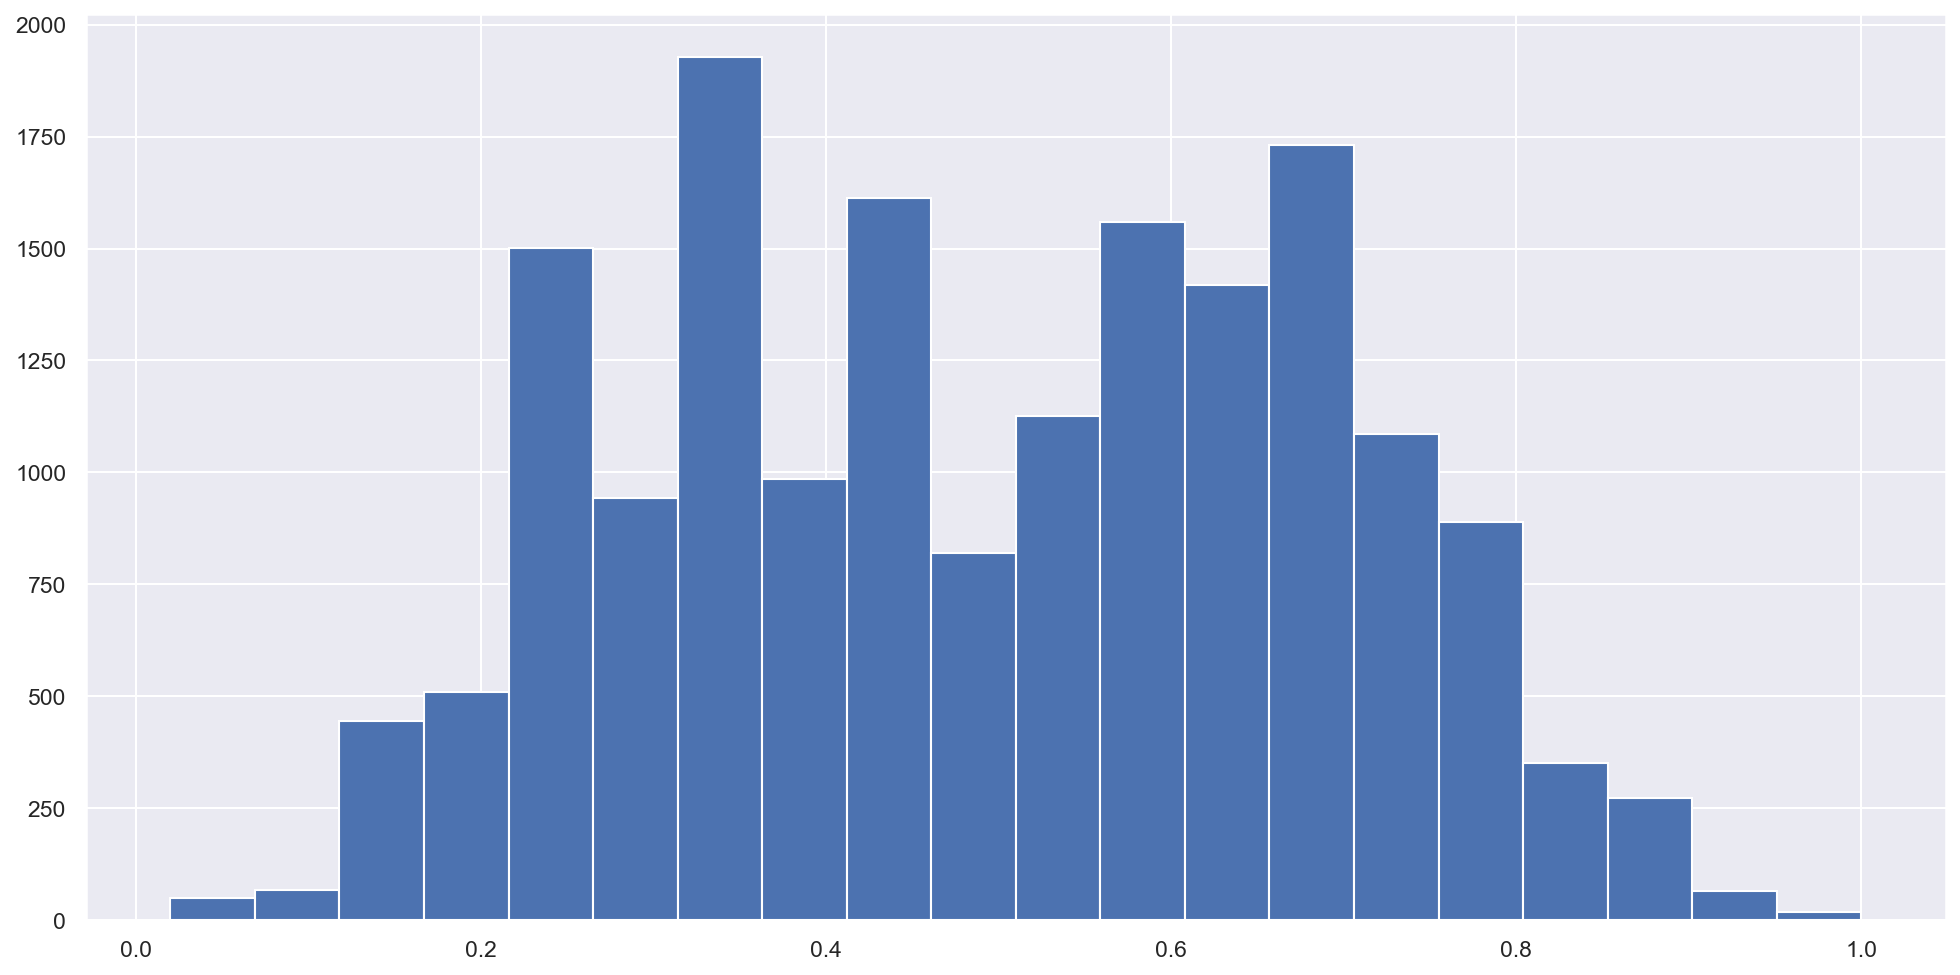

In [16]:
plt.hist(full['temp'], bins = 20, color='b')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

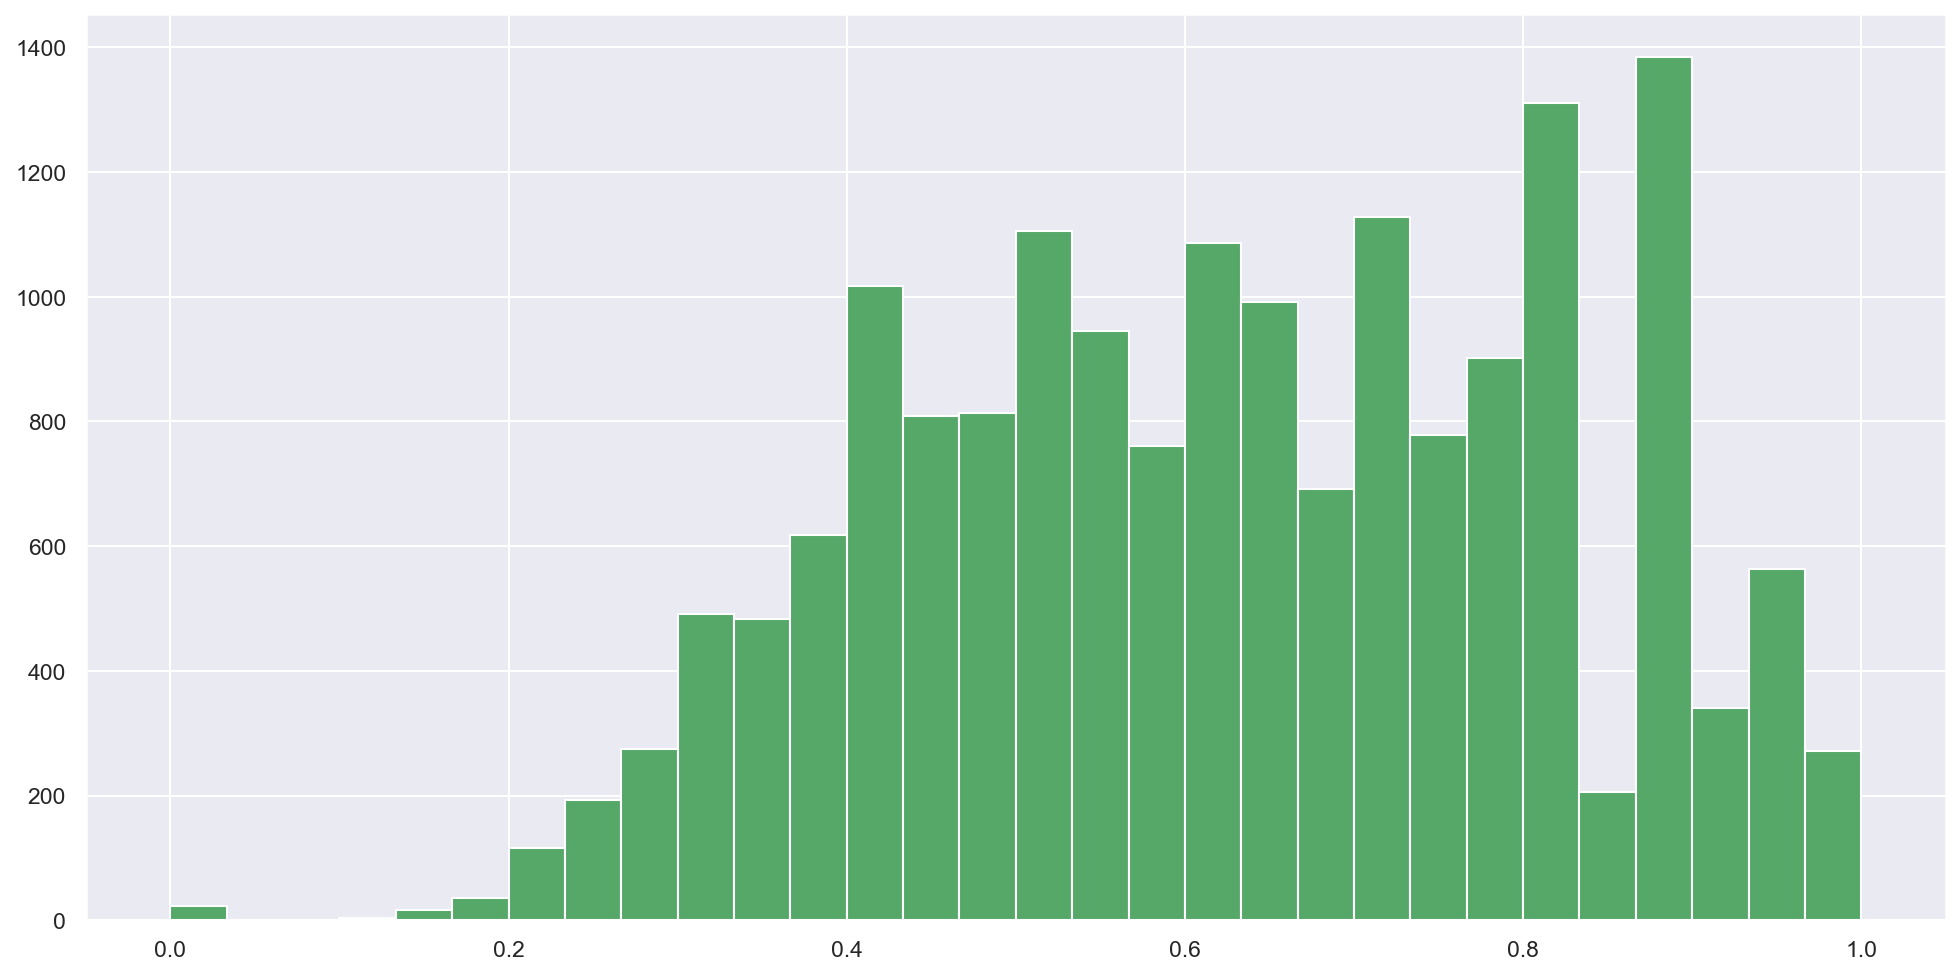

In [30]:
plt.hist(full['hum'], bins = 30, color='g')
plt.show

In [35]:
full[full['hum']==0].shape[0]

22

*** I first checked the numerical data that encodes for categorical data, to see if there where any weird numbers of numbers that were not replaced earlier. So I checked with value_counts() making sure to check for NAs too. A notable issue was with the column "Weathersit" as there are 27 0s that do not encode for anything. We learned that one of the most common ways to handle missing values is to ingnore them, thus dropping any row that had an entry 0 as "weathersit". This decision shouldn't cause any problems because the number of entries with this problem are not many. ***

*** For temperature and humidity, instead, we can use histograms (and more) to check for outliers. For Humidity there are 22 entries were the humidity is 0 and it seems to be a cluster by itself, so I will also drop any entries were "hum" = 0. ***

In [18]:
full = full.drop(full[full.weathersit == 0].index)
full['weathersit'].value_counts()

1    11393
2     4538
3     1418
4        3
Name: weathersit, dtype: int64

In [36]:
full = full.drop(full[full.hum == 0].index)
full[full['hum']==0].shape[0]

0

---
## 2: Exploring the Distribution of Users

Let's begin by comparing the distribution of the daily counts of casual and registered users. The following questions require some heavy plotting. Below we are summarizing some functions (should be updated on the latest versions). 

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

### Question 2
#### Question 2a

Use the [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

**Hint:** You will need to set the `stat` parameter appropriately to match the desired plot.

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

**Update 13/2: distplot is deprecated, work with displot or histplot instead**

<function matplotlib.pyplot.legend(*args, **kwargs)>

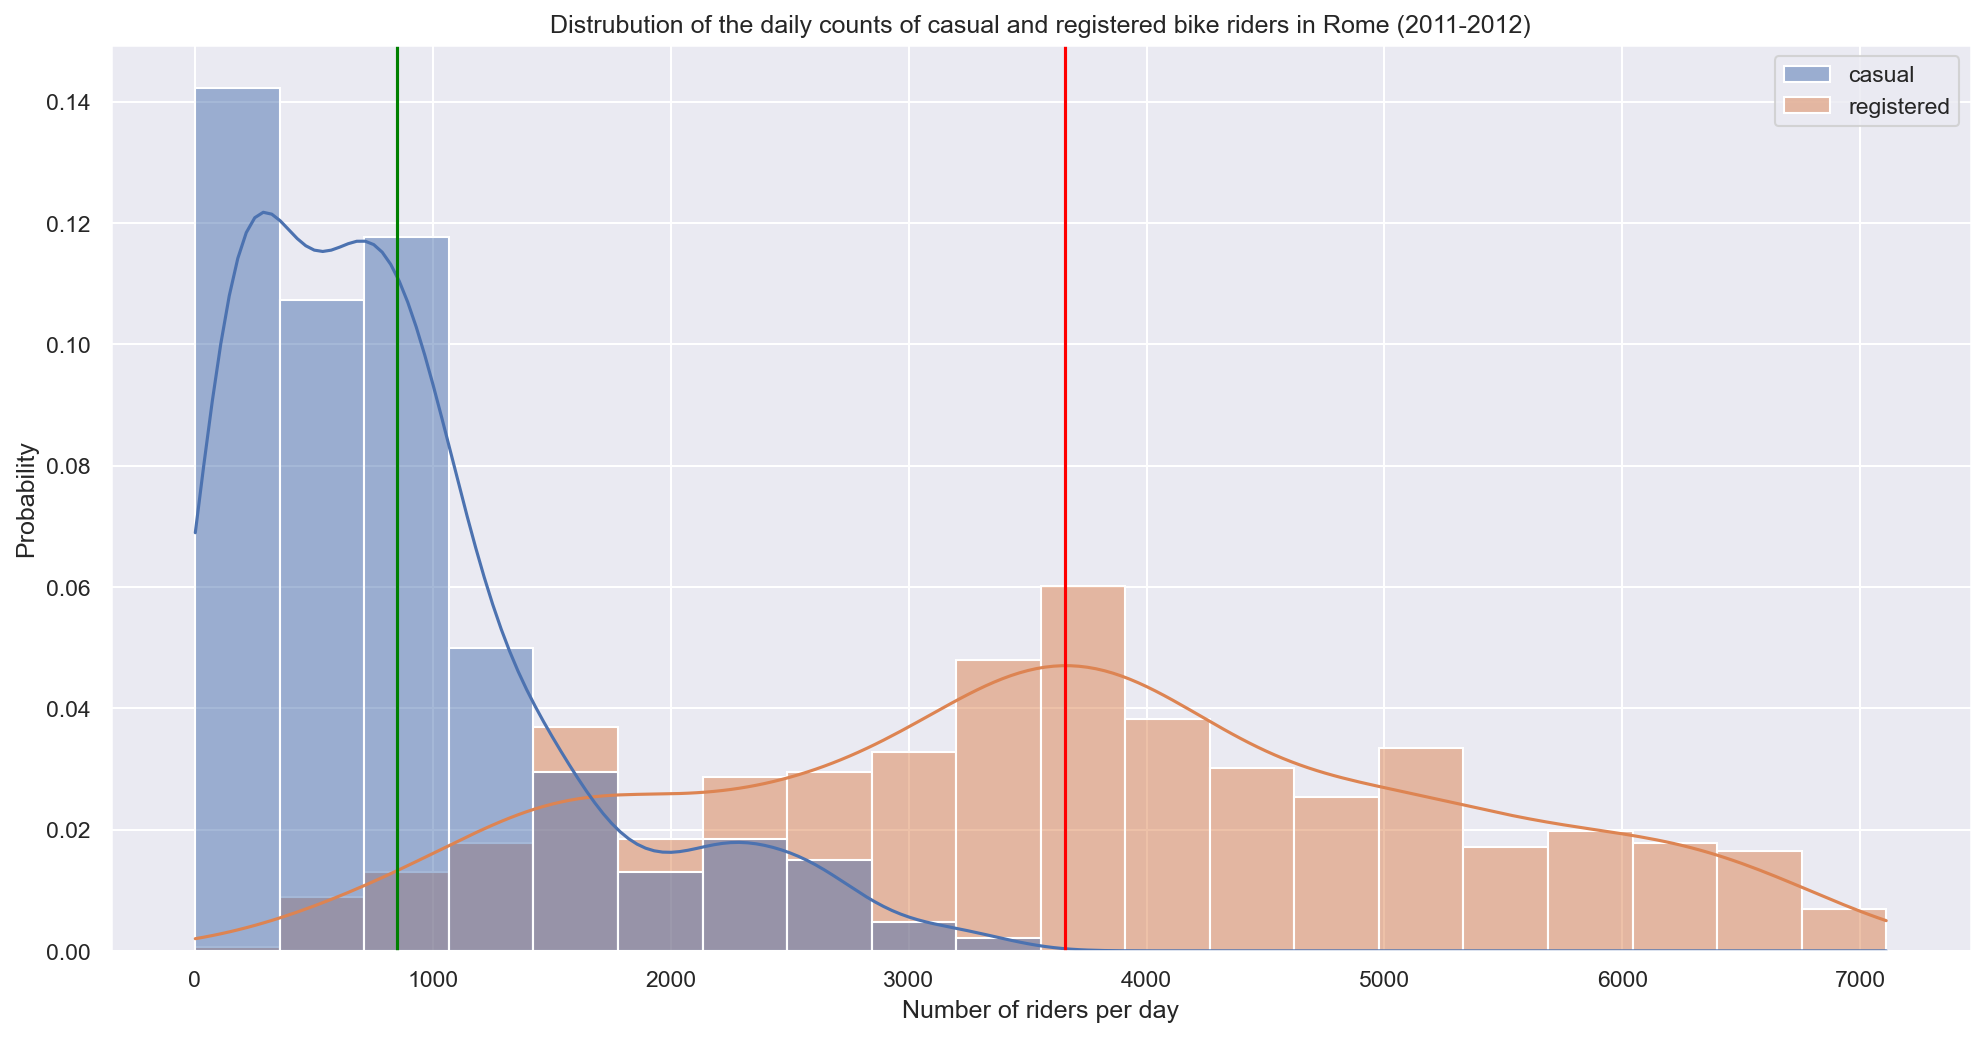

In [43]:
#code for 2a goes here
sns.histplot(data = daily_counts, bins=20, kde=True, stat = 'probability')
plt.axvline(x=daily_counts['casual'].mean(), color = 'green', label = 'casual mean')
plt.axvline(x=daily_counts['registered'].mean(), color = 'red', label = 'registered mean')
#xlabel
plt.xlabel("Number of riders per day")
#ylabel
plt.ylabel("Probability")
#title
plt.title("Distrubution of the daily counts of casual and registered bike riders in Rome (2011-2012)")
#legend
plt.legend

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered users.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

In the histplot above we can observe the probability of a certain amount of registered (in orange) and casual (in blue) number of riders per day in rome. 

The most noticable difference in the shape of the two distributions is that for casual it is right skewed and for registered it is a more normal and symmetrical distribution. 

From this we can reason that there are much less casual riders than registered riders. Moreover from the kde we can see that registered riders have a larger standard deviation, meaning that there is more spread in the data. 

For example the mean for the registered riders is around 4000 but there is still what seems to be a probability of 0.01 that the number or registered riders is around 500, and kind of the same for 7000 (the two extremes). Instead if we look at the distribution of casual riders the mean is around 1000, and the rest does not spread too far from that.

### Question 2c

In addition to the type of user (casual vs. registered) and the overall count of each, what other kinds of demographic data would be useful (e.g. identity, neighborhood, monetary expenses, etc.)? 

I think there are a few other important data that could be collected and that impact the use of scooters (especially in Rome). For example: 

Age of users: this also kind of intertwinds with the Neighborhood, for example if the a lot of the users are university students, more scooters can be placed closed to schools, universities and residential areas. 

Neighborhood/ Traffic in Neighborhoods: this can also be for example to check for who can afford scooters or not, or if there are other type of transportation means in the area. For example if there are multiple metro stops in the area, maybe not a lot of people would use scooters. 

Number of Accidents: Also this is important and can also intertwind again with neighborhood, cause in some of them there is more traffic, or the roads are damaged and this can lead to danger and more accidents, which maybe for example could increase the number of casual riders, or decrease the number of any riders in general for that neighborhood. 

Maybe you can also check what type of scooters, electric or not. 

Lastly, I don't know if this is a bit too specific, but there are some things that (as an Italian that lived in rome) are specific to Rome, for example the Winter floods, but even the theft rate and number of scooters stolen etc.

### Question 2d

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

<!--
BEGIN QUESTION
name: q2d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

For the Age it could be tricky because you can start riding certain types of scooters from when you are 14-16 however these users are not recognized as adults yet so there could be some privacy issues. Similarly, also with collecting the Neighborhood from where people are from, or where they work/study etc. some people may not want to consent to that.


### Question 2e

The density plots do not show us how the counts for registered and casual users vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `full` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

**Hints (updated):** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws` in the `sns.lmplot` call.

* You will need to call [`plt.title`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) to add a title for the graph.

Text(0.5, 1.0, 'Relationship between casual and registered bike users in Rome depending on Working days (2011-2012)')

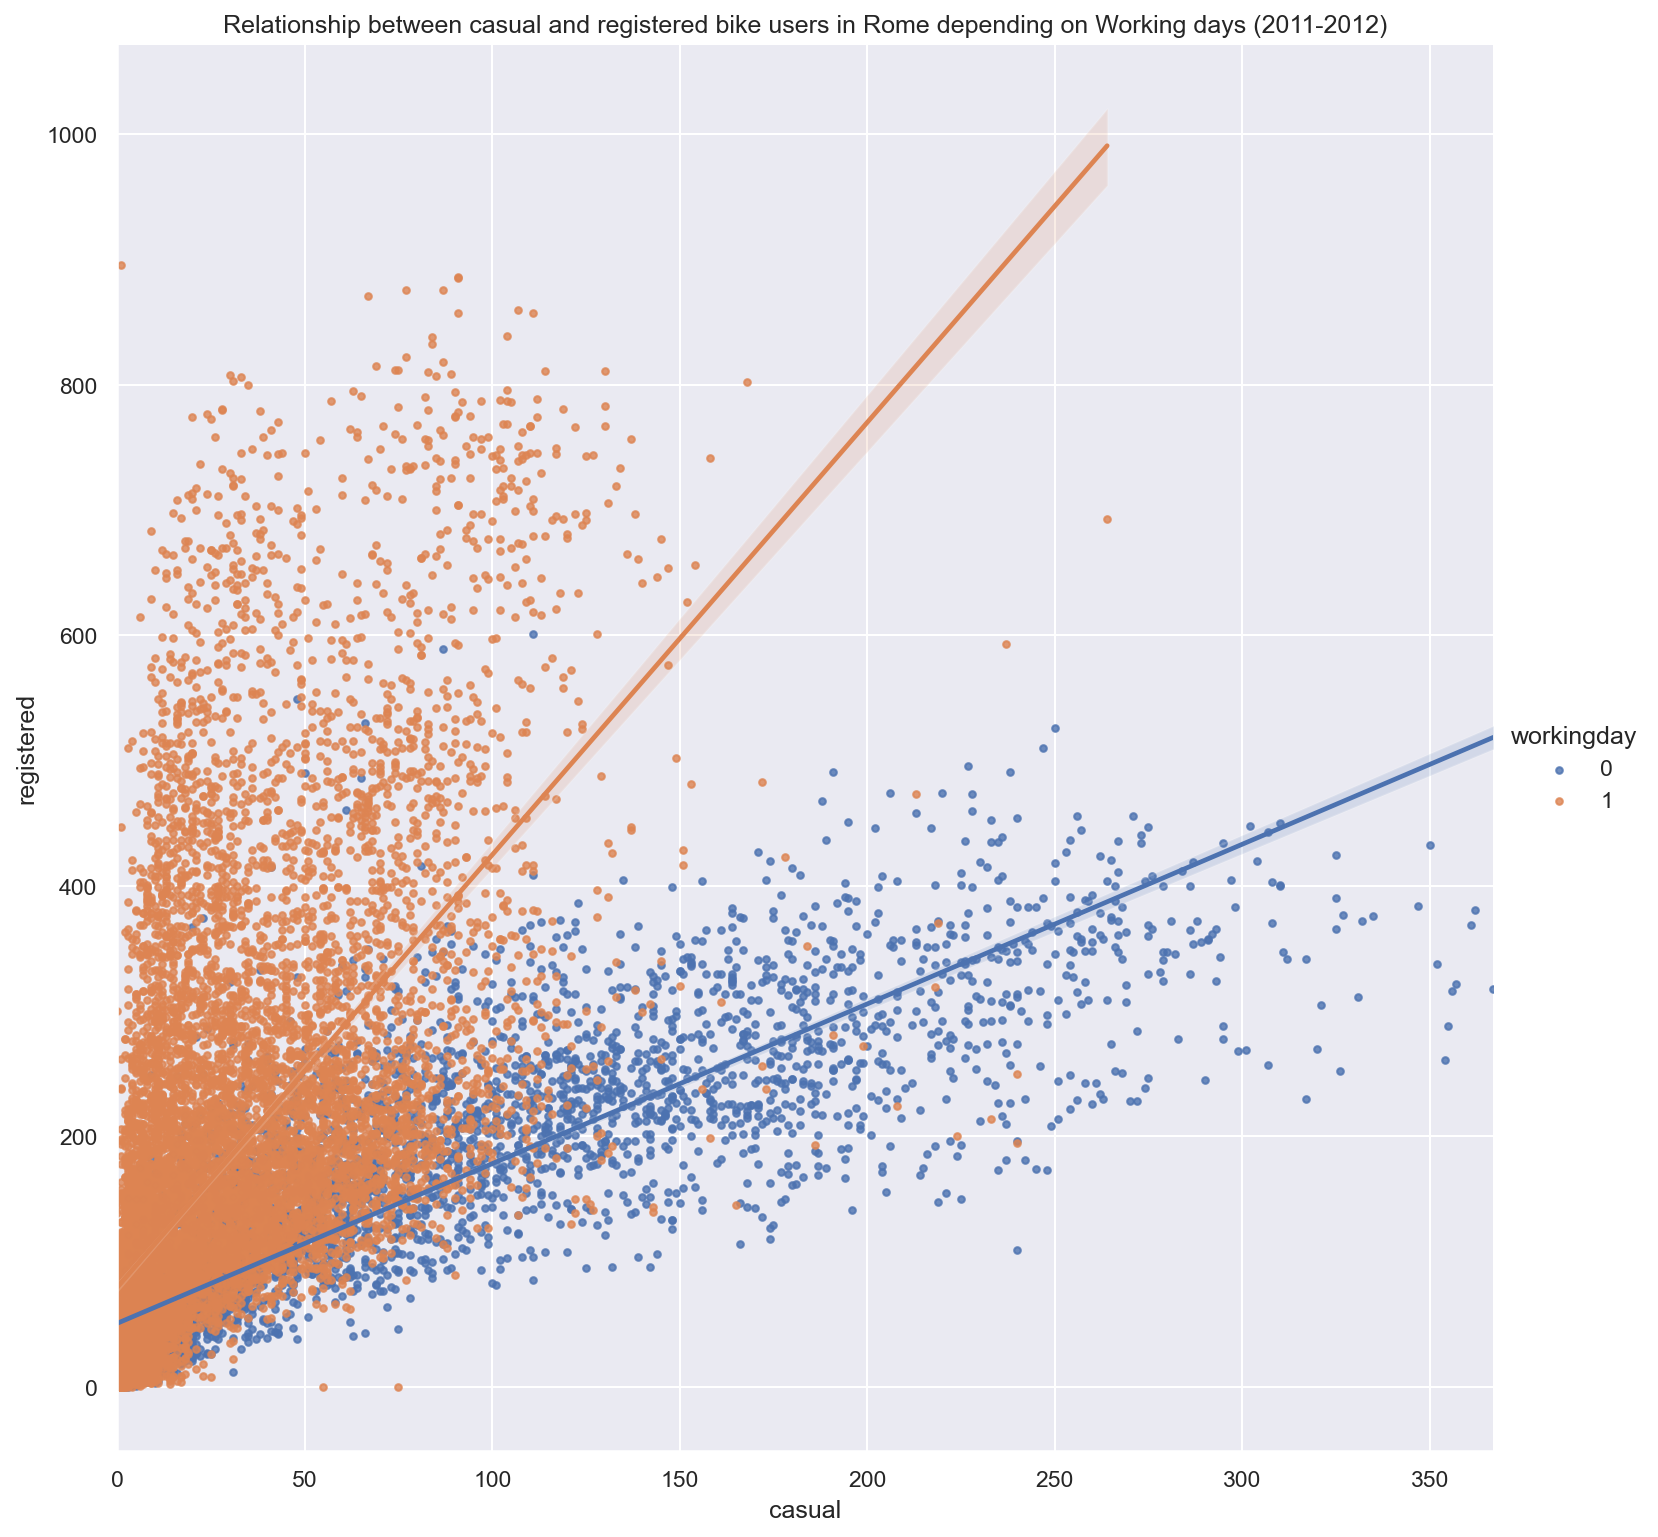

In [20]:
#code to 2e goes here
sns.lmplot(data = full, x = 'casual', y = 'registered', hue = 'workingday', fit_reg = True, scatter_kws={"s": 10}, height = 10)
plt.title("Relationship between casual and registered bike users in Rome depending on Working days (2011-2012)")


### Question 2f

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered users and whether or not the day is a working day or not? What effect does [overplotting](https://www.displayr.com/what-is-overplotting/) have on your ability to describe this relationship?

There are much more registered users on working days, while most of the casual riders can be seen during not working day. This makes sense as non working days are weekends, were poeple don't go to work, and more turists (which could count as casual riders) are in the city. 

Looking at the linear regression lines it seems to be that the more registered riders, the more casual riders there are too, which means that there is a positive relationship between the two. When both casual and registered users are low in numbers we can see that there is a lot of overplotting, and we can't really see what is going on.

---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, we will try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes data from working and non-working days, which isn't what we want. Check the code below for how to generate a simple KDE plot. Adjust any variable names, if you have to.

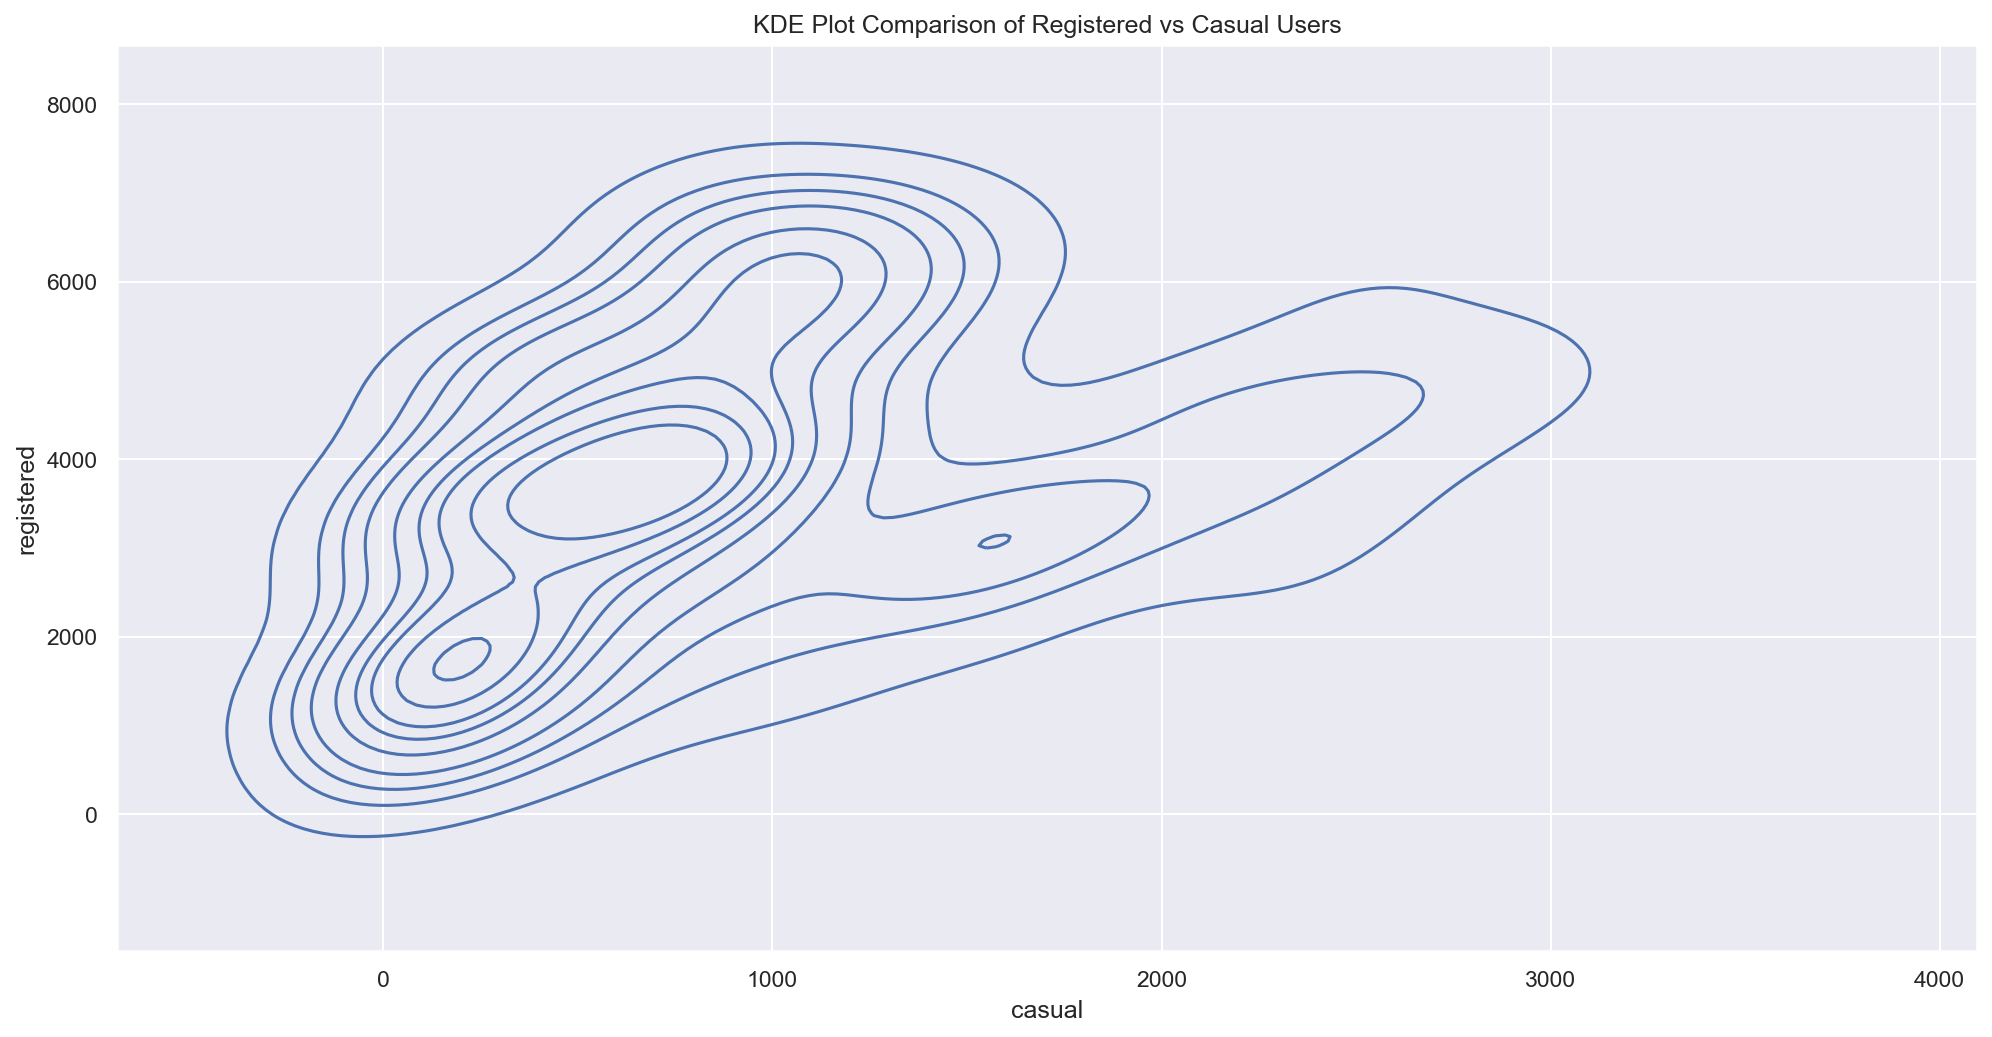

In [21]:
sns.kdeplot(data=daily_counts, x='casual', y='registered')


#deprecated (old) (update 13/2)
#sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Users');

Generating the plot with working and non-working days separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints (updated):** 
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice, each time drawing different data from the `daily_counts` table.
* Check out this [guide](https://matplotlib.org/stable/tutorials/introductory/usage.html) to see an example of how to create a legend. In particular, look at how the example in the guide makes use of the `label` argument in the call to `plt.plot()` and what the `plt.legend()` call does. This is a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like), and also set the `label` parameter to address which type of day you want to plot. You are required for this question to use two sets of contrasting colors for your plots.

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 

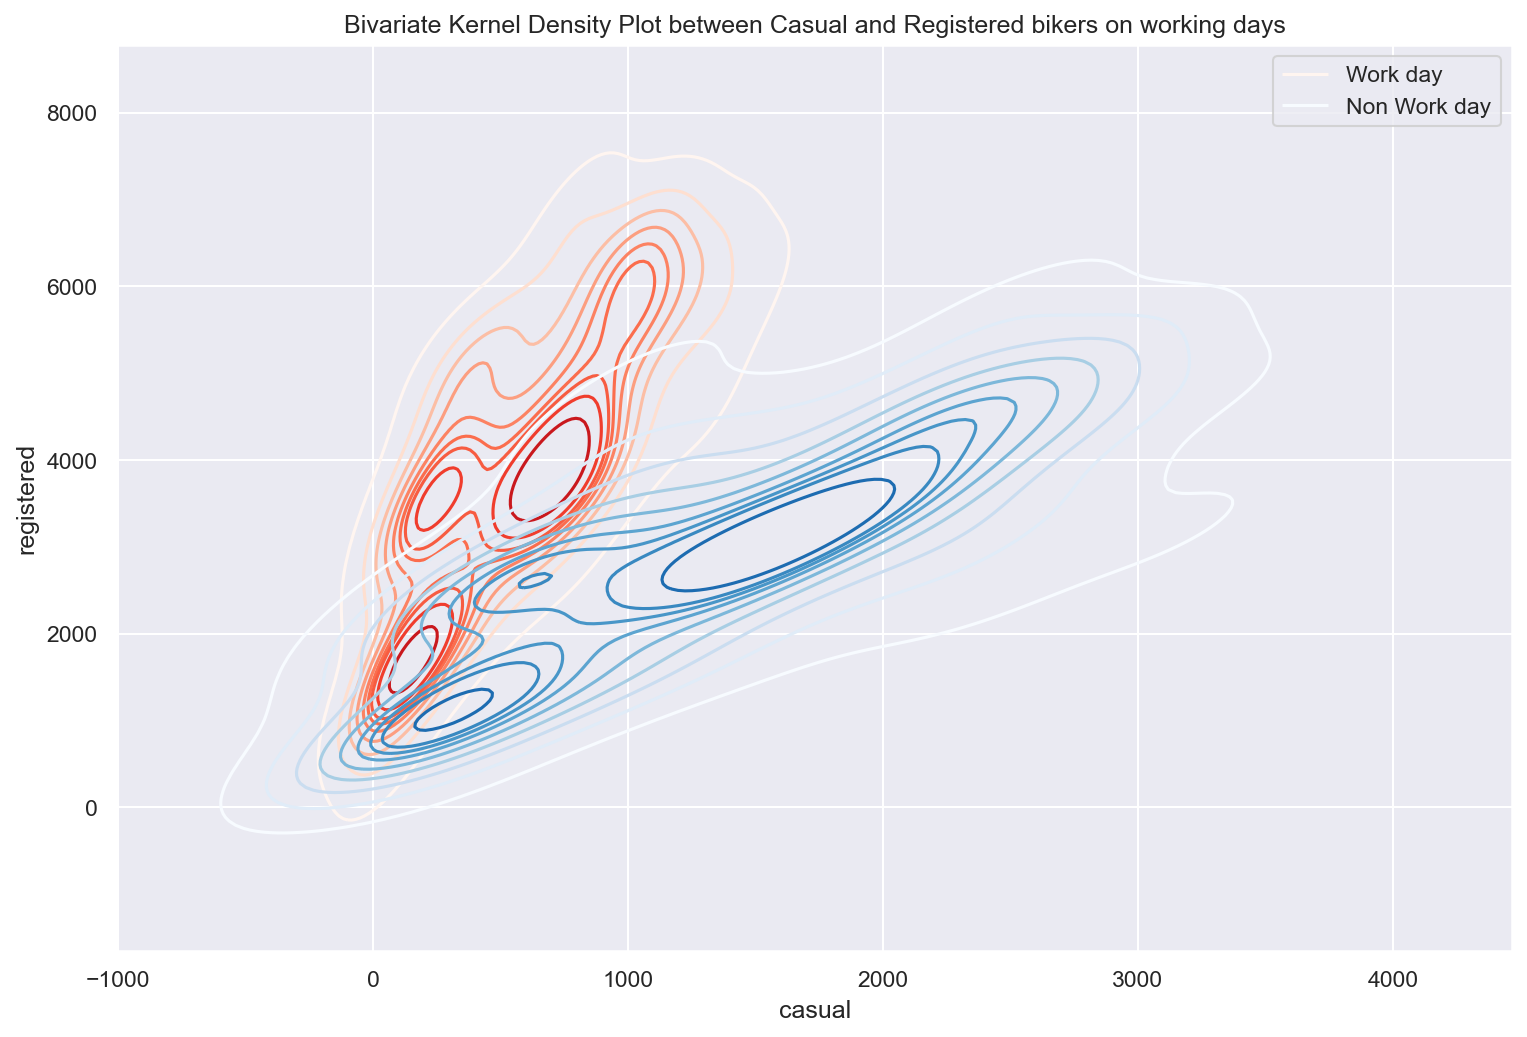

In [44]:
#code to 3a goes here

# Set the figure size for the plot
plt.figure(figsize=(12,8))

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = daily_counts[daily_counts['workingday'] == 'yes']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(data = is_workingday, x = 'casual', y = 'registered', cmap = 'Reds', shade = False, label = 'Work day')

not_workingday = daily_counts[daily_counts['workingday'] == 'no']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for non-workingday rides
sns.kdeplot(data = not_workingday, x = 'casual', y = 'registered', cmap = 'Blues', shade = False, label = 'Non Work day')
plt.title("Bivariate Kernel Density Plot between Casual and Registered bikers on working days")
plt.legend()

#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

Visibly this is much better than the scatter plot as there are no points overlapping, we can see what happens when there are less casual riders, and we can see that when there are closer to 0 casual riders, (both on working and non working days) there are around 1000 registered riders. I think this is interesting as it seems that no matter the day nor the amount of causal riders, there is always a base/standard of registered riders.



## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual users plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (working day vs. non-working day).

**Hints (updated)**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.

**Note**:
* At the end of the cell, we called `plt.suptitle` to set a custom location for the title.
* We also can call `plt.subplots_adjust(top=0.9)` in case your title overlaps with your plot.

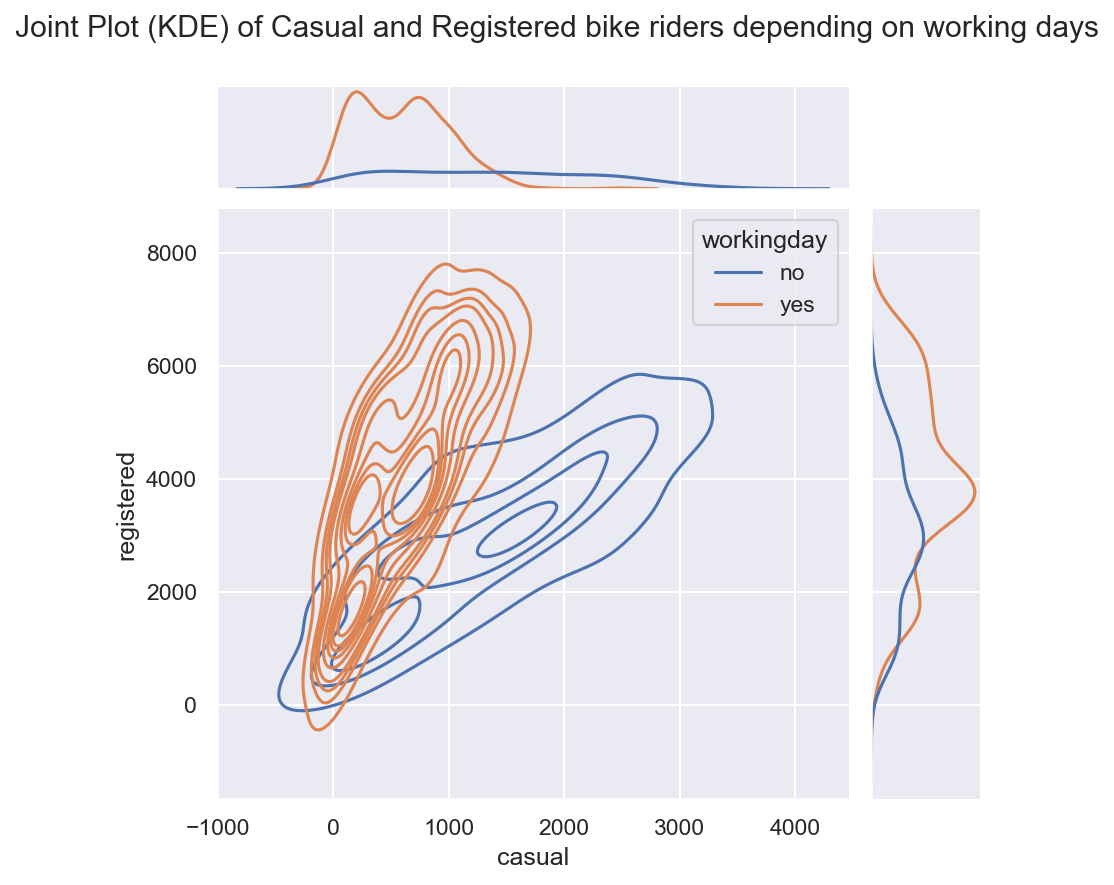

In [45]:
#code for 4 goes here
sns.jointplot(
    data=daily_counts,
    x="casual", y="registered", hue="workingday",
    kind="kde"
)
plt.suptitle("Joint Plot (KDE) of Casual and Registered bike riders depending on working days")
plt.subplots_adjust(top=0.9)

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of users by plotting the average number of users for each hour of the day over the **entire dataset**, stratified by user type. Here, two line plots in the same figure should be okay (pay attention to proper labeling).


In [24]:
#answer to 5a goes here

# avg of casual and registered users per hour
grouped_hr = full.groupby("hr")
#grouped_hr_sum = grouped_hr.sum()
#grouped_hr_sum.head(10)
grouped_hr.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,281,2011-01-13,1,0,1,3,0,4,1,1,0.14,0.1212,0.50,0.3284,0,3,3
304,305,2011-01-14,1,0,1,3,0,5,1,1,0.10,0.1364,0.54,0.1045,0,1,1
327,328,2011-01-15,1,0,1,3,0,6,0,2,0.16,0.2273,0.59,0.0000,1,7,8
351,352,2011-01-16,1,0,1,3,0,0,0,1,0.22,0.2727,0.69,0.0000,9,6,15


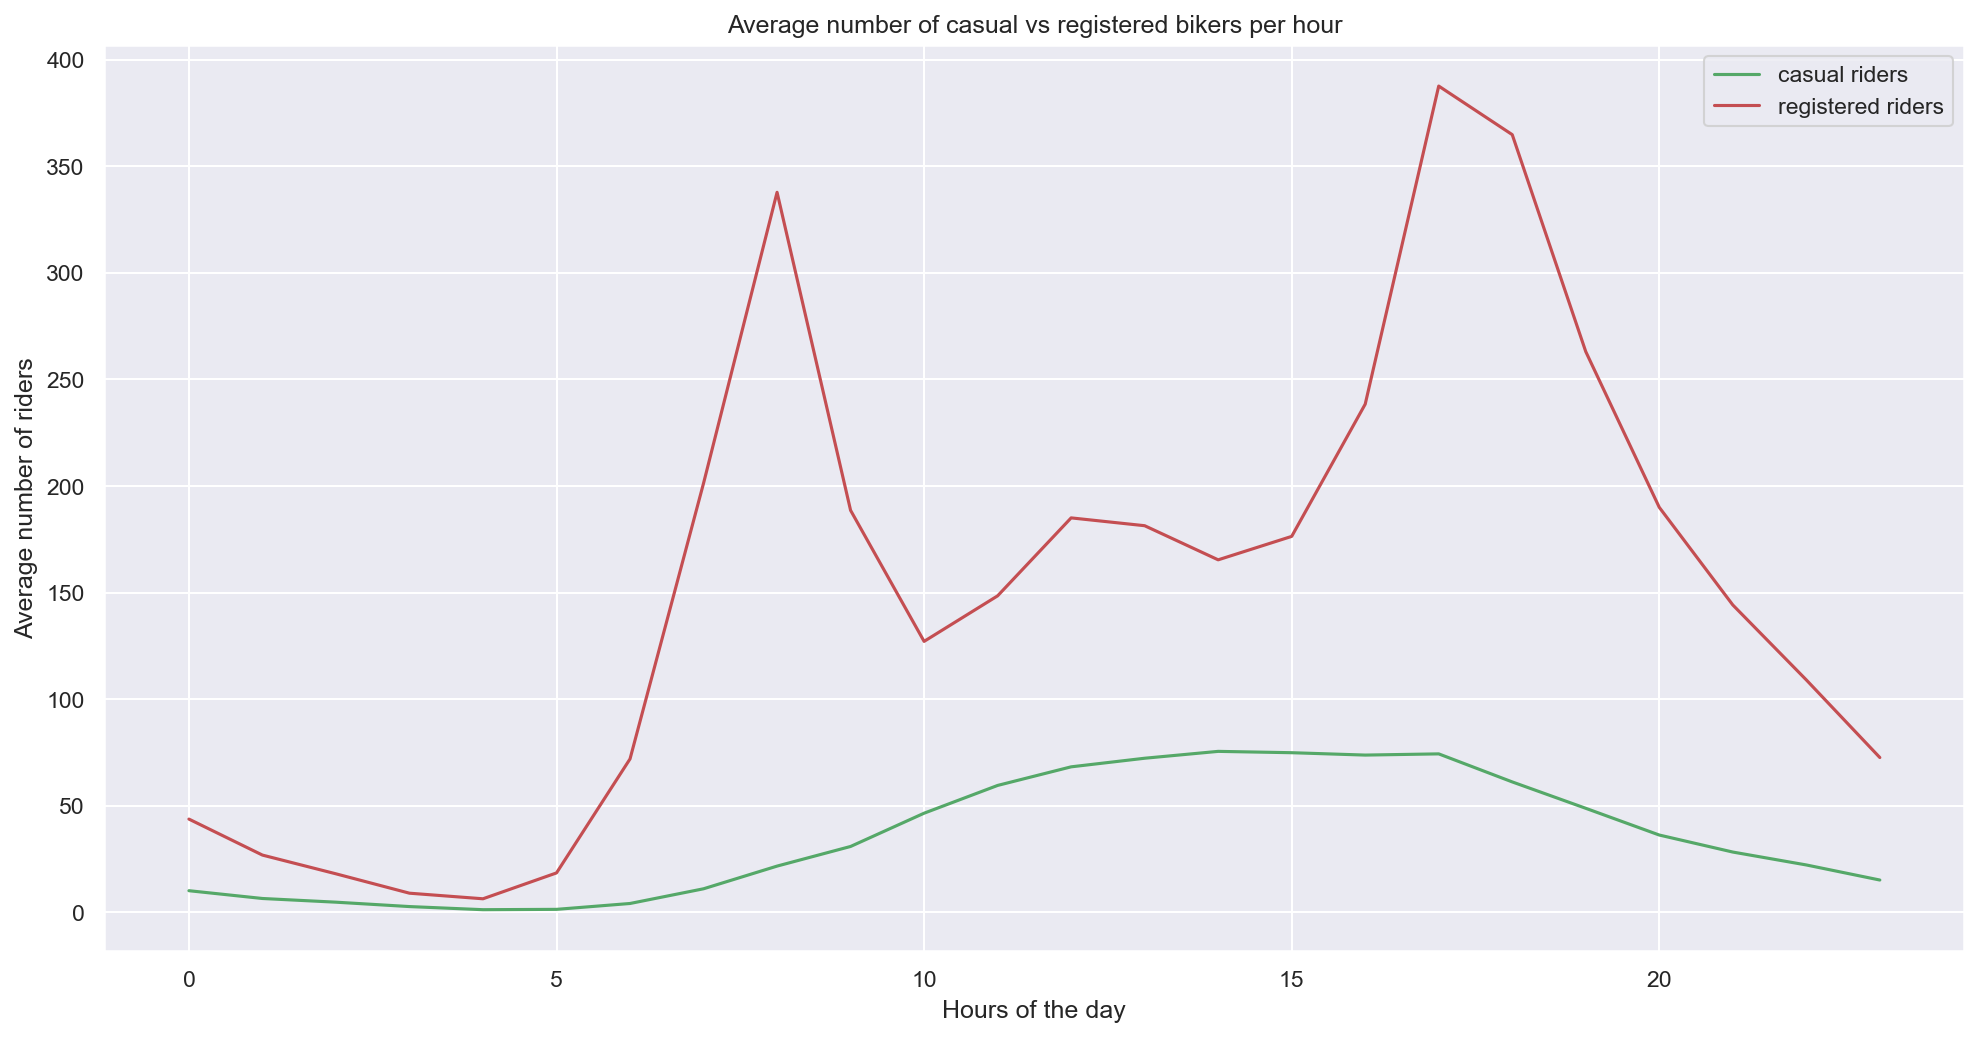

In [25]:
grouped_hr_casual= grouped_hr["casual"].mean()
grouped_hr_registered = grouped_hr["registered"].mean()
plt.plot(grouped_hr_casual, color = 'g', label = 'casual riders')
plt.plot(grouped_hr_registered, color = 'r', label = 'registered riders')
plt.xlabel("Hours of the day")
plt.ylabel("Average number of riders")
plt.title("Average number of casual vs registered bikers per hour")
plt.legend()

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered users' distribution.

Looking at the average number of registered users, there are two main peaks. One around 7/8 am and one around 6pm. As I stated in one of the answers above, it would make sense if most of the registered users are working people and maybe some students. Working people start working anytime from 5am to 8am and leave from work/school anytime from 3 to 7pm. At the beginning I found curious that when there is a big decrease in registered users (9am-4pm) is when there is actually in increase in casual riders. But then if we stay within the hypothesis that for example casual riders are turists of people from out of town, it would make sense that these users go out later in the morning.

---
## 6: Exploring Users and Weather

Now let's examine how the weather is affecting user' behavior. First let's look at how the proportion of casual user changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `full` DataFrame representing the proportion of casual users out of all users.

In [26]:
#answer to 6a goes here
full_new['prop_casual'] = full_new['casual']/full_new['cnt']
full_new.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


#### Question 6b
In order to examine the relationship between proportion of casual users and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below (or adapt it if you have renamed any variables) and then comment on its explainability.

**Hint**: You will need to set the `data`, `x`, `y`, and `hue` in the `sns.scatterplot` call.

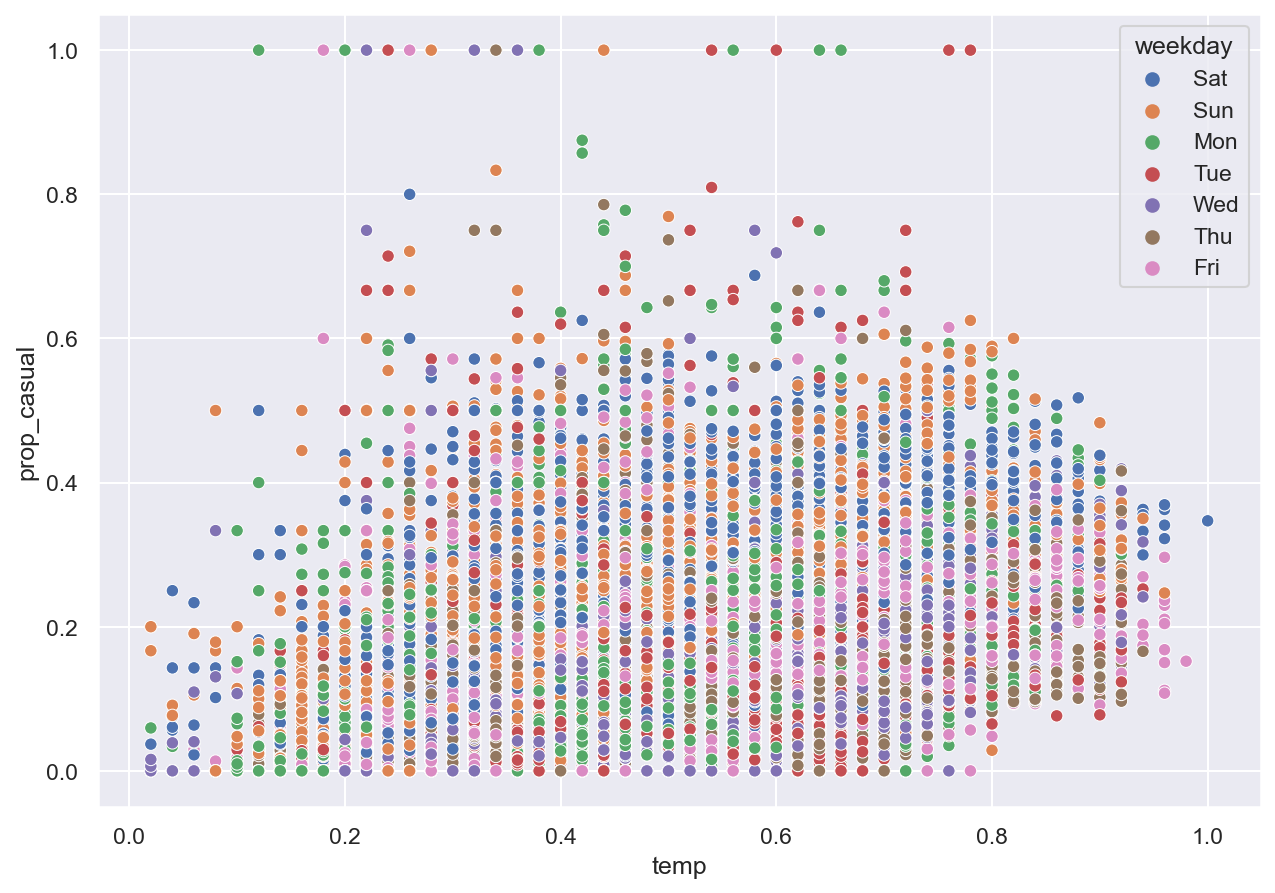

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=full_new, x="temp", y="prop_casual", hue="weekday");

How would you comment on this figure? Mention any problems you see. How would you think of approaching this problem?

I think that there is a problem with overplotting, there are too many colours together an I can only see a few patterns. 
One of the main patterns I see is that, especially on saturday and sundays (so non working days, when you would expect to see more casual riders) the higher the temperature the the more casual bikers.


A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The green curve shown is a smoothed version of the scatterplot.

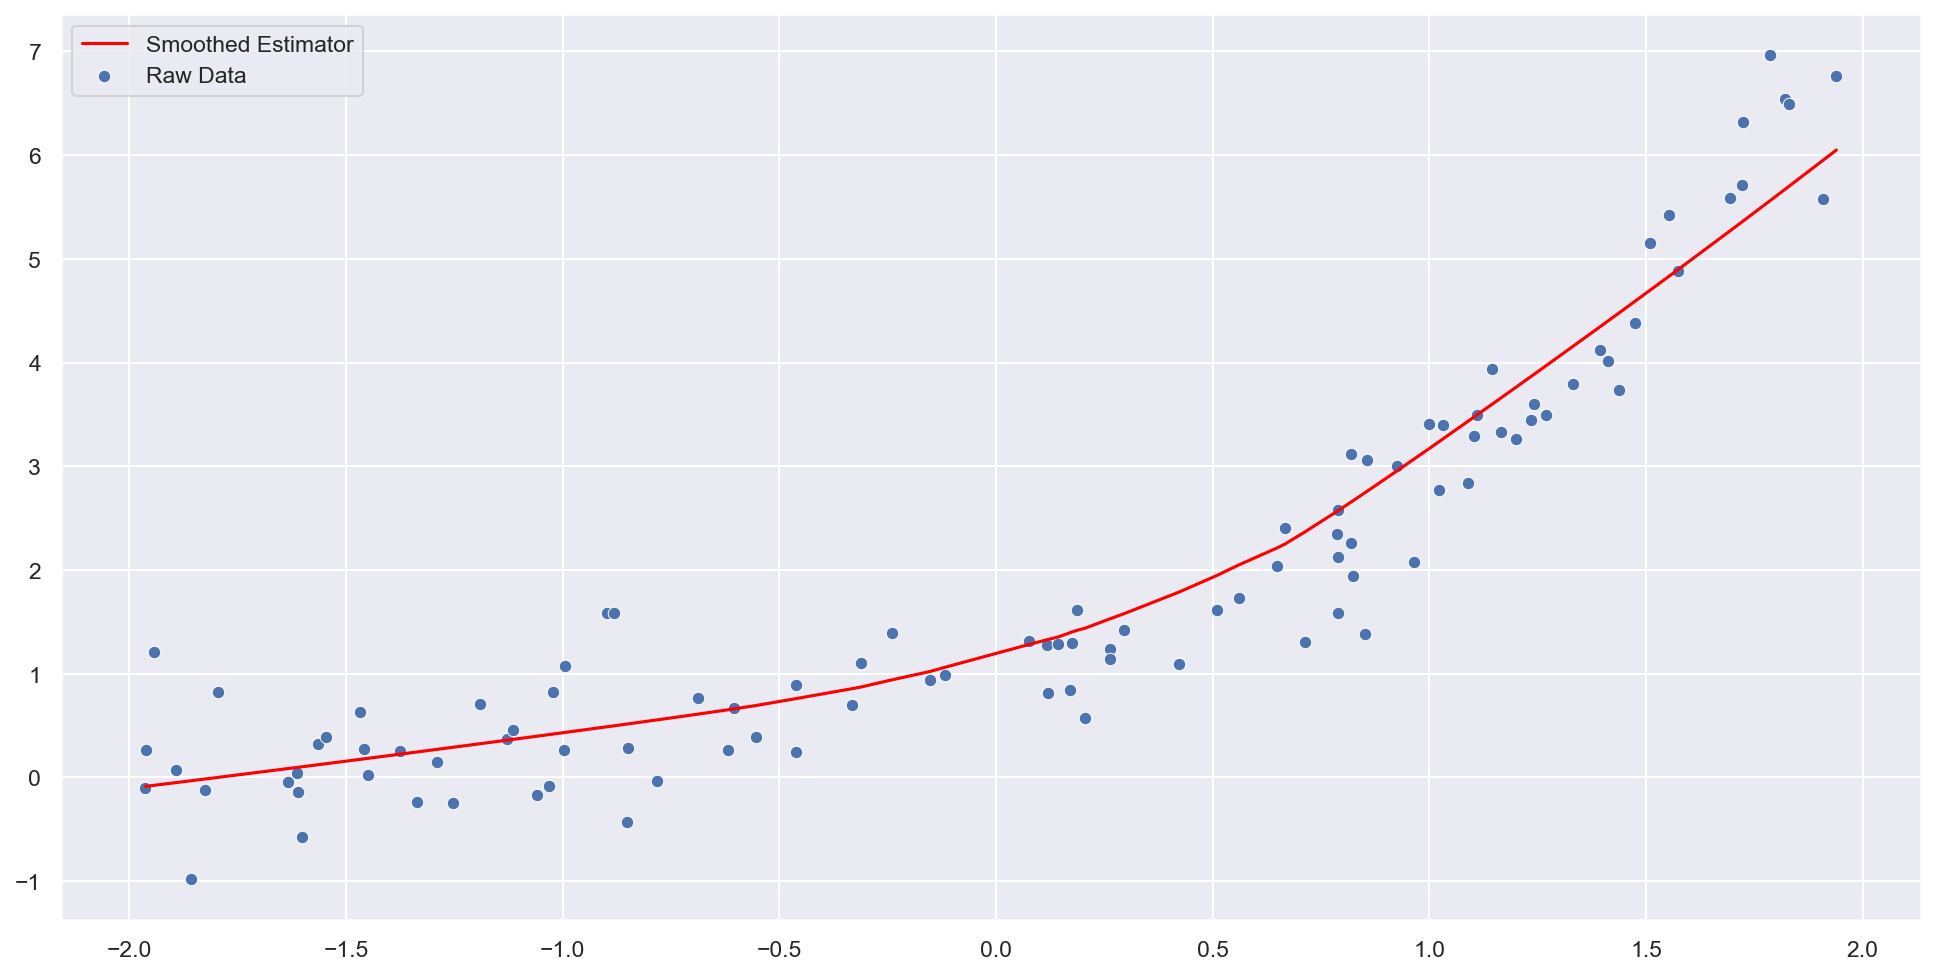

In [28]:
#updated 13/2
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(x=xobs, y=yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(x=xobs, y=ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the users' data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual users.

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate. You should also set the `return_sorted` field to `False`.

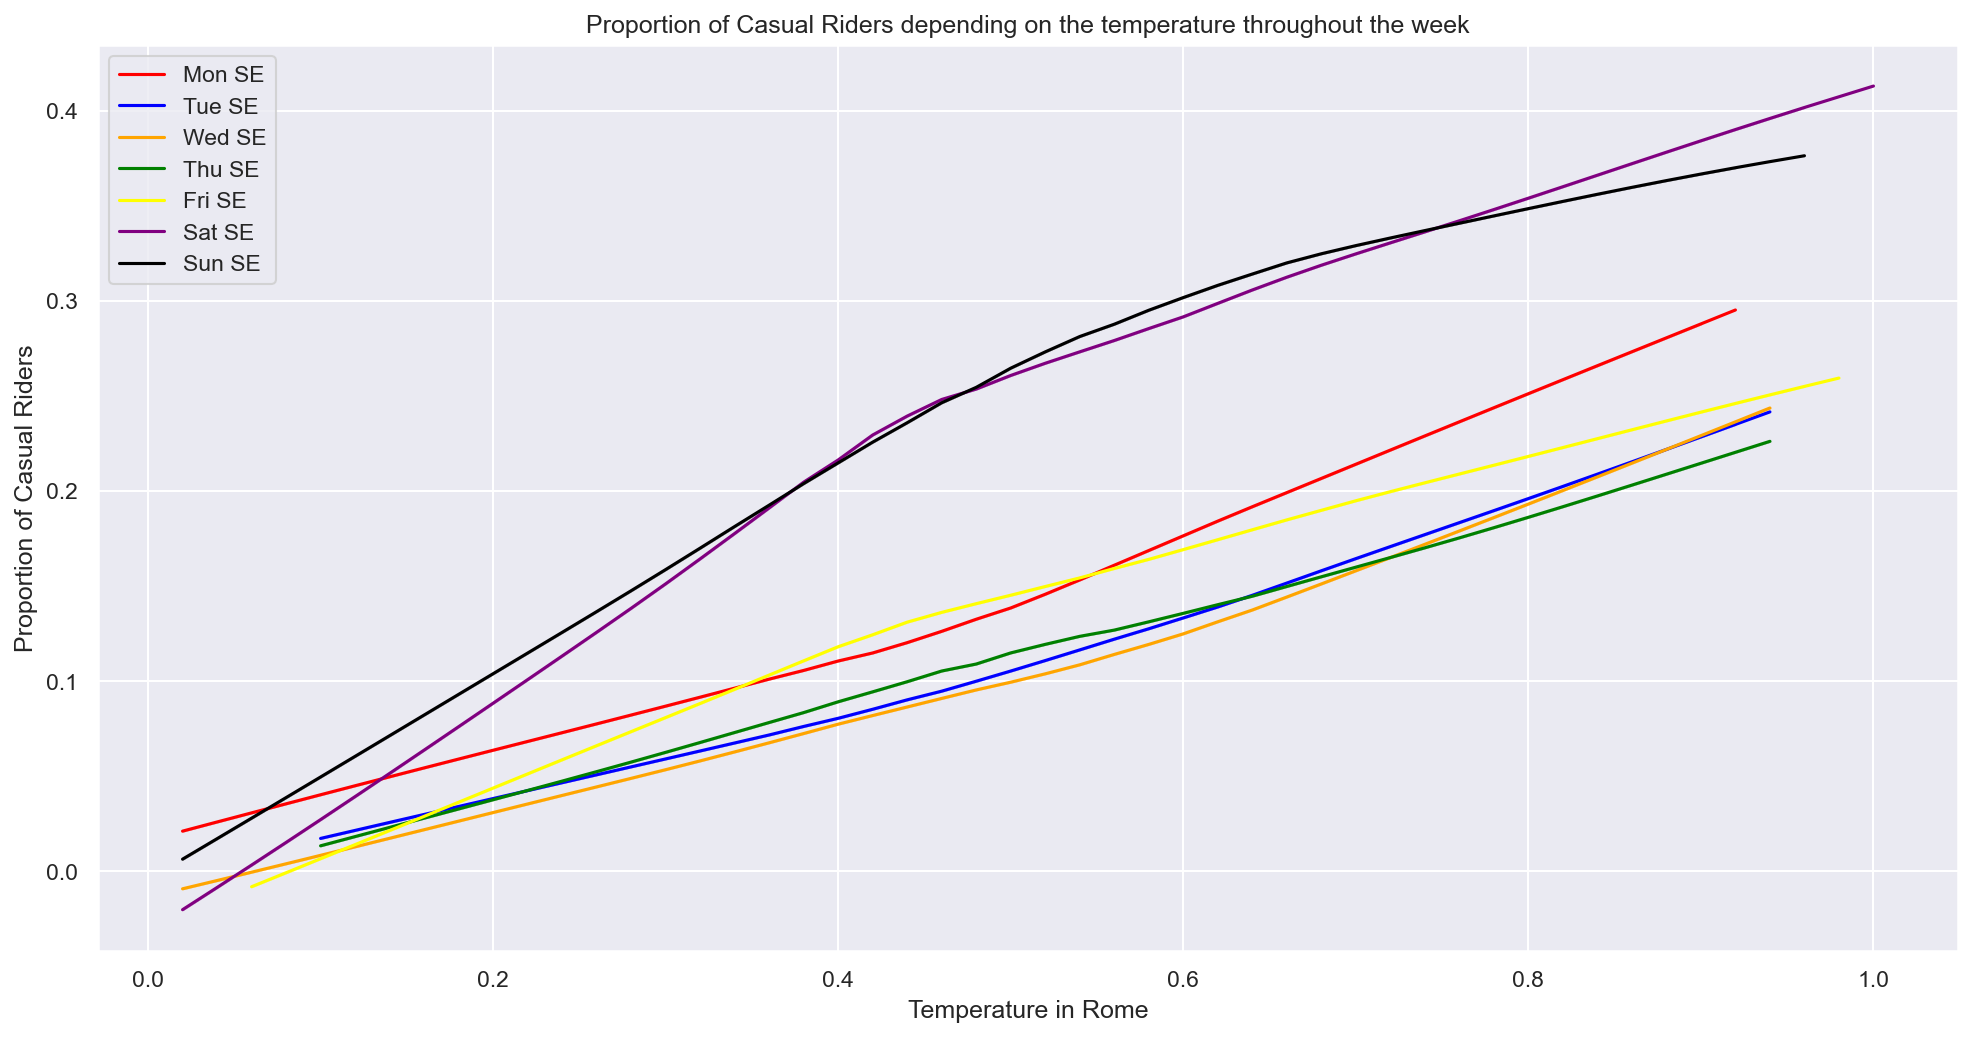

In [50]:
from statsmodels.nonparametric.smoothers_lowess import lowess

#your code for 6b
# Predict 'smoothed' valued for observations

# x is temperature and y is prop_casual

#Monday
mon = full_new[full_new['weekday'] == 'Mon']
ysmooth = lowess(mon['prop_casual'], mon['temp'], return_sorted=False)
sns.lineplot(x= mon['temp'], y=ysmooth, label="Mon SE", color='red')

#Tuesday
tue = full_new[full_new['weekday'] == 'Tue']
ysmooth = lowess(tue['prop_casual'], tue['temp'], return_sorted=False)
sns.lineplot(x= tue['temp'], y=ysmooth, label="Tue SE", color='blue')

#Wednesday
wed = full_new[full_new['weekday'] == 'Wed']
ysmooth = lowess(wed['prop_casual'], wed['temp'], return_sorted=False)
sns.lineplot(x= wed['temp'], y=ysmooth, label="Wed SE", color='orange')

#Thursday
thur = full_new[full_new['weekday'] == 'Thu']
ysmooth = lowess(thur['prop_casual'], thur['temp'], return_sorted=False)
sns.lineplot(x= thur['temp'], y=ysmooth, label="Thu SE", color='green')

#Friday
fri = full_new[full_new['weekday'] == 'Fri']
ysmooth = lowess(fri['prop_casual'], fri['temp'], return_sorted=False)
sns.lineplot(x= fri['temp'], y=ysmooth, label="Fri SE", color='yellow')

#Saturday
sat = full_new[full_new['weekday'] == 'Sat']
ysmooth = lowess(sat['prop_casual'], sat['temp'], return_sorted=False)
sns.lineplot(x= sat['temp'], y=ysmooth, label="Sat SE", color='purple')

#Sunday
sun = full_new[full_new['weekday'] == 'Sun']
ysmooth = lowess(sun['prop_casual'], sun['temp'], return_sorted=False)
sns.lineplot(x= sun['temp'], y=ysmooth, label="Sun SE", color='black')

plt.xlabel('Temperature in Rome')
plt.ylabel('Proportion of Casual Riders')
plt.title('Proportion of Casual Riders depending on the temperature throughout the week')
plt.legend();

### Question 6c

What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

As I was saying previously it seems that the proportion of casual riders in rome is much greater during the weekend (Sat and Sun), but other than that, we see that there is a psitive correlation between temperature and number of casual scooter riders, the warmer it is the more users are active.



### Question 6d

Based on the data you have explored (distribution of users, daily patterns, weather, additional data/information you have seen), do you think this scooter user info should be realistically scaled across other cities in Italy. Why or why not? Justify your answer as a data scientist.

I believe that certain aspects that were explored and what was concluded could be applied to several other cities. 
For example the last thing we looked at, which was the impact of temperature on the usage of scooters could be scaled to across other cities. However in general I think that data should be collected from other cities in Italy and then if possible all conclusions collectively can be used to make decisions. 
For example, Rome is a very big city and people are used to scooters and they have their own traffic and particular weather. Already in a city in the north like Torino, there are much less scooters because it is colder and smaller. But consider for example a city like Venezia, where the main transport is by boat, then the exploration of the data would be completely different. Maybe the conclusions from the data in Rome could be scaled to other cities around Europe that have similar characteristics such as a similar number of citizens, turism, temperature or/and traffic.

So I would say that the data as it is now could not be scaled across all other cities in Italy, but possible very similar cities around Europe. 

### Question 7a. Compute Something Interesting

Play with the data and try to compute something interesting about the data. Please try to use at least one of groupby, pivot, or merge (or all of the above).  

Please show your work in the cell below and describe in words what you found in the same cell. This question will be graded leniently but good solutions may be used to create future clinics.

#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): Uses a combination of pandas operations (such as groupby, pivot, merge) to answer a relevant question about the data. The text description provides a reasonable interpretation of the result.
- **Passing** (1-3 points): Computation is flawed or very simple. The text description is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No computation is performed, or a computation with completely wrong results.


***Put your code in one cell below and your explanation in a markdown cell below***

Text(0.5, 1.0, 'Stacked Bar Plot of total amount of Casual and Registered riders over the month (2011-2012)')

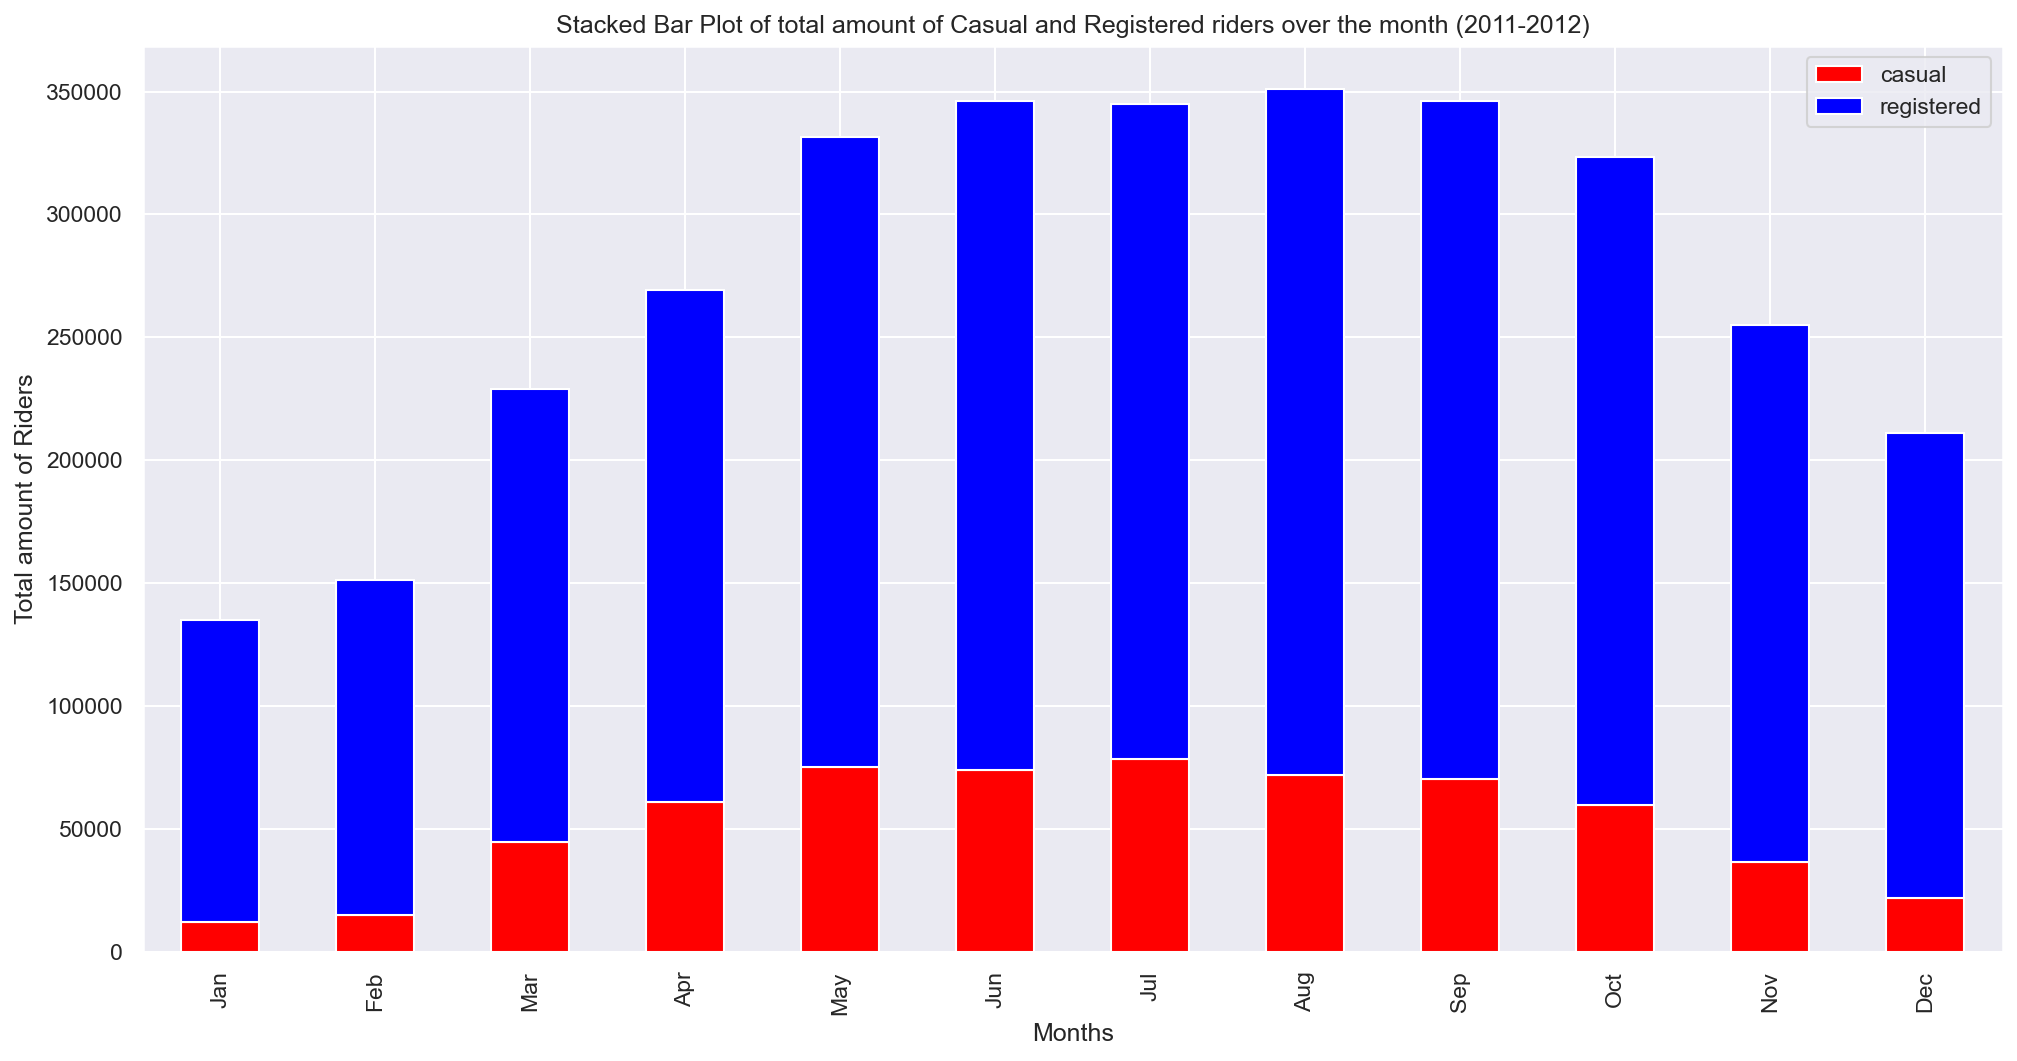

In [73]:
full_new_mnth = full_new.replace({'mnth': {1 : 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}})
#full_new_mnth.head()
month_counts = full_new_mnth[['mnth', 'casual', 'registered']].copy()
month_counts = month_counts.set_index('mnth')
grouped_mnth = month_counts.groupby("mnth", sort = False)
month_counts = grouped_mnth.agg({'casual':sum, 'registered':sum })
month_counts.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.xlabel("Months")
plt.ylabel("Total amount of Riders")
plt.title("Stacked Bar Plot of total amount of Casual and Registered riders over the month (2011-2012)")

On the EDA notebook it said that a good visualisation to use if there is time are stacked bar plots. 
This is nice cause we can see how much the usage of bikes increases with a better weather from sunnier months, especially in the summer, where we can also hypothesize that there are more holidays/less working days and more tourism. I think this plot continues to support the previously concluded opservations. 

### Question 7b. Create some more cool visualizations!

Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found. This question will be graded leniently, but good solutions may be used to create future clinic problems. 


#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (1-3 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No chart is created, or a chart with completely wrong results.

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

***Put your code in one cell below and your explanation in a markdown cell below***

In [ ]:
#your code for 7b

*** explanation goes here ***

